# Hierarchical clustering for session 1


## Make spiketimes and events dataframe


In [2]:
# HIDE CODE 
import deps
from importlib import reload
reload(deps)

alldat, dat_LFP, dat_ST = deps.get_data()
dat = alldat[1]
# sp, neu, trial_starts = deps.convert_raster_to_spiketimes(dat)
dat_st=dat_ST[1]['ss']

This dataset has ['CA1' 'POST' 'VISl' 'VISpm' 'root'], meaning ['hipp' 'vis ctx' 'cortical subplate']


## Cluster entire trial, no PSTH

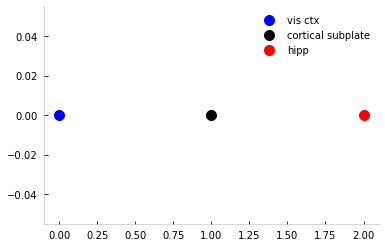

In [4]:
# HIDE CODE
reload(deps)

deps.cluster_trial_start(dat['spks'], deps.spykes_get_brain_regions(dat['brain_area'])) 

## Make and plot clusters

In [ ]:
# HIDE CODE

sp, neu, trial_starts = deps.concat_spiketimes(dat_st)
events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                        event_names=('gocue', 'response_time','feedback_time'),
                                        condition_names=('response','contrast_right','contrast_left','feedback_type'))

spykes_times = deps.spykes_get_times(sp, neu) 
spykes_times = deps.spykes_add_brain_regions(spykes_times, dat['brain_area'])

for event_name in events_df.columns[events_df.columns.str.contains('time')]:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        print(f"======= {event_name} / {condition_name} =======")
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=[-500, 1500], 
                               bin_size=10,
                               )
        # Make psth
        xar=deps.spyke2xar(all_psth,
                           spykes_times['brain_group'].values,  
                           spykes_times['brain_group_color'].values)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True)